# 1. Procesamiento y etiquetado de fondos

Trabajaremos con las imagenes en monocolor y cada imagen es de 62 x 47 pixeles, por lo que vamos a procesar las fotografías de fondos para tener las mismas propiedades.

El total de imagenes de rostros es 13233, asi que trataremos de llegar a un número similar de imagenes de fondos. Para lograr eso dividiremos las fotografías.

In [8]:
import matplotlib.pyplot as plt
import code.carga as carga

positive_faces = carga.positive_patches()
negative_faces = carga.negative_patches()

ACA VA ALGUN EJEMPLO DE LAS IMAGENES ETCCCCCCC

# 2. Creación de conjuntos de train y test

Juntamos los imagenes de caras con las imagenes de fondos para obtener nuestro dataset, con un total de 26353 muestras. Etiquetamos las caras con 1 (clase positiva) y los fondos con 2 (clase negativa). Luego de esto, particionamos el dataset en train y test utilizando la proporción 80% - 20%.

In [9]:
import numpy as np

# Etiquetas para caras (clase positiva)
positive_labels = np.tile(1, 13233)

# Etiquetas para fondos (clase negativa)
negative_labels = np.tile(0, 13120)

samples = np.concatenate((positive_faces, negative_faces))
labels = np.concatenate((positive_labels, negative_labels))

print(f'shape de dataset: {samples.shape}')
print(f'shape de dataset: {labels.shape}')

shape de dataset: (26353, 62, 47)
shape de dataset: (26353,)


CHEAQUEAR EL RESTO DE CLASIFICADORES. SOLO ESTA LA REGRESION

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(samples, labels, test_size=0.20, random_state=42)

print(f'muestras entrenamiento: {X_train.shape}')
print(f'muestras validacion: {X_test.shape}')

muestras entrenamiento: (21082, 62, 47)
muestras validacion: (5271, 62, 47)


In [11]:
import code.clasifiers as cls

log = cls.LogisticRegressionClassifier()

log.train(np.reshape(X_train,(21082, 2914)), y_train)
y_pred = log.classify(np.reshape(X_train,(21082, 2914)))


In [37]:
from sklearn.metrics import classification_report
import json

report_test = classification_report(y_train, y_pred)
results_test = report_test.split('\n')
results_test = results_test.split(' ')
print(results_test)

['              precision    recall  f1-score   support', '', '           0       0.99      0.99      0.99     10534', '           1       0.99      0.99      0.99     10548', '', '    accuracy                           0.99     21082', '   macro avg       0.99      0.99      0.99     21082', 'weighted avg       0.99      0.99      0.99     21082', '']


## 3. Preprocesamiento de datos

Como primer acercamiento vamos entrenar tres modelos utilizando solamente una matriz que contiene los HOG features de cada imágen.

EN EL CODIGO SOLO ESTA EL DE HOG faltan los otros dos

In [4]:
from skimage import data, color, feature

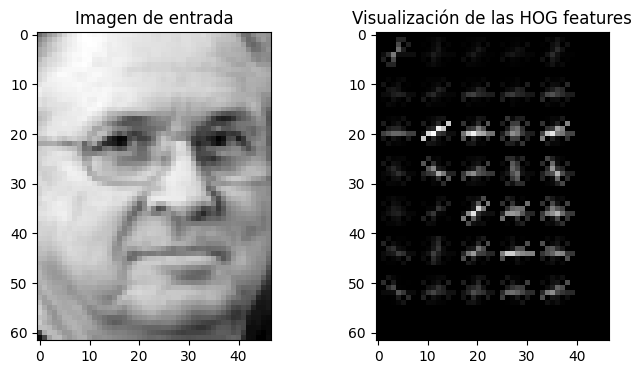

In [5]:
muestra_ejemplo = X_train[100]

hog_features, hog_vis = feature.hog(muestra_ejemplo, visualize=True, feature_vector=False)

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(muestra_ejemplo, cmap='gray')
ax[0].set_title('Imagen de entrada')

ax[1].imshow(hog_vis, cmap='gray')
ax[1].set_title('Visualización de las HOG features');

In [6]:
n_train_rows = X_train.shape[0]
n_test_rows = X_test.shape[0]

X_train_hog = np.array([feature.hog(X_train[i]) for i in range(n_train_rows)])
X_test_hog = np.array([feature.hog(X_test[i]) for i in range(n_test_rows)])

In [7]:
X_train_hog.shape

(21082, 1215)

### 3.1 Regresión logística

In [8]:
from sklearn.linear_model import LogisticRegression

log_reg_cv = LogisticRegression(solver='liblinear', random_state=42)
#log_reg_cv = LogisticRegressionCV(cv=5, solver='liblinear', random_state=42)
log_reg_cv.fit(np.reshape(X_train,(21082, 2914)) , y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [9]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_curve

In [10]:
y_pred_train_hog = log_reg_cv.predict(np.reshape(X_train,(21082, 2914)))

In [11]:
confusion_matrix(y_train, y_pred_train_hog)

array([[10462,    72],
       [  141, 10407]])

In [12]:
precision_score(y_train, y_pred_train_hog)

0.9931291153736044

In [13]:
recall_score(y_train, y_pred_train_hog)

0.9866325369738339

In [14]:
y_pred_test_hog = log_reg_cv.predict(np.reshape(X_test,(5271, 2914)))

In [15]:
confusion_matrix(y_test, y_pred_test_hog)

array([[2505,   81],
       [  37, 2648]])

In [16]:
precision_score(y_test, y_pred_test_hog)

0.9703187980945401

In [17]:
recall_score(y_test, y_pred_test_hog)

0.986219739292365

### 3.2 Random Forest


In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
random_forest = RandomForestClassifier()

In [20]:
random_forest.fit(X_train_hog, y_train)

RandomForestClassifier()

In [21]:
y_pred_forest_hog = random_forest.predict(X_test_hog)

In [22]:
confusion_matrix(y_test, y_pred_forest_hog)

array([[2575,   11],
       [  44, 2641]])

## 3.3 K vecinos más cercanos

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
#probar con diferentes k
knn = KNeighborsClassifier()

In [25]:
knn.fit(np.reshape(X_train,(21082, 2914)), y_train)

KNeighborsClassifier()

In [26]:
y_pred_knn = knn.predict(np.reshape(X_test,(5271, 2914)))

In [27]:
confusion_matrix(y_test, y_pred_knn)

array([[2559,   27],
       [ 318, 2367]])

In [28]:
precision_score(y_test, y_pred_knn)

0.9887218045112782

In [29]:
recall_score(y_test, y_pred_knn)

0.8815642458100559

### 3.2 Boosting

RESULTADOS

In [1]:
%run ./code/test.py

Testing KNNClassifier with reshape
Accuracy: [1 0 0 ... 1 0 1]
Precision: [1 0 0 ... 1 0 1]
Recall: 0.24153494834899902


IndexError: tuple index out of range